## Computer Vision Projects : Face Blurring, using YuNet 2023 face detection model 
### Melika Heydari Rad

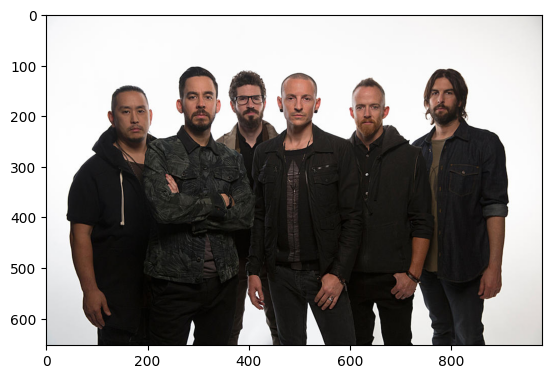

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# showing the image in which we want to blur faces
image = cv2.imread("images/Linkin-Park.jpg")
plt.imshow(image[...,::-1])

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.9,
    0.3,
    5000
)

image = cv2.imread("images/Linkin-Park.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)

In [3]:
# coords of bounding box and coords of face landmarks
result

(1,
 array([[135.11899   , 156.69951   ,  70.565506  ,  94.377686  ,
         159.80664   , 191.20401   , 191.73021   , 190.87537   ,
         179.05829   , 210.1102    , 161.46574   , 224.48355   ,
         188.42686   , 224.35815   ,   0.93694603],
        [371.68707   , 140.03009   ,  60.52335   ,  74.7529    ,
         390.93457   , 168.34262   , 416.30444   , 168.37155   ,
         405.39694   , 183.53836   , 393.533     , 195.21089   ,
         415.4949    , 194.375     ,   0.9323337 ],
        [756.89453   , 128.37007   ,  58.934715  ,  80.39279   ,
         766.335     , 158.08127   , 794.056     , 157.82785   ,
         776.5602    , 172.92085   , 769.0865    , 185.13683   ,
         792.6718    , 186.70914   ,   0.92979103],
        [468.27573   , 131.19337   ,  64.41771   ,  90.23932   ,
         483.1339    , 166.37642   , 512.80304   , 166.32559   ,
         496.748     , 184.79126   , 486.59055   , 197.17982   ,
         511.1689    , 197.44408   ,   0.9277665 ],
        

number of detected faces: 6


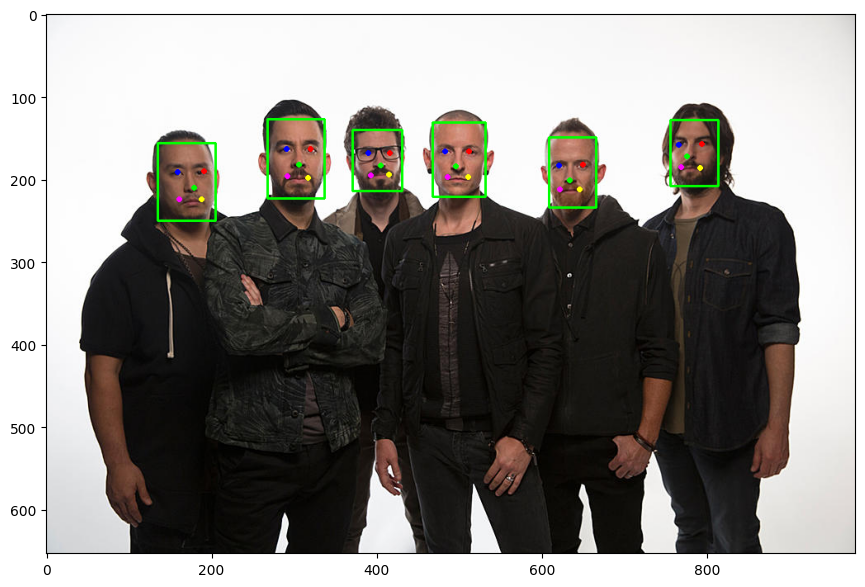

In [4]:
print("number of detected faces:", len(result[1]))

thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        cv2.circle(image, (coords[4], coords[5]), 2, (255, 0, 0), thickness)
        cv2.circle(image, (coords[6], coords[7]), 2, (0, 0, 255), thickness)
        cv2.circle(image, (coords[8], coords[9]), 2, (0, 255, 0), thickness)
        cv2.circle(image, (coords[10], coords[11]), 2, (255, 0, 255), thickness)
        cv2.circle(image, (coords[12], coords[13]), 2, (0, 255, 255), thickness)

plt.figure(figsize=[15,7])
plt.imshow(image[...,::-1]);

number of detected faces: 6


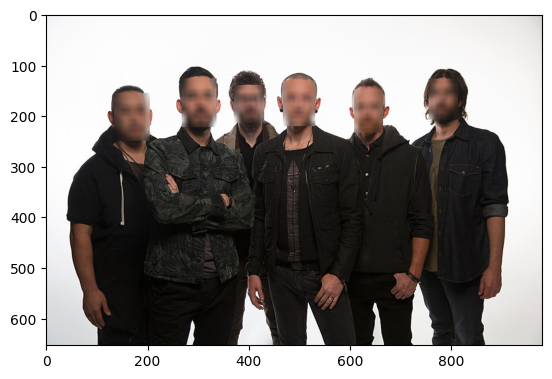

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.3,
    0.2,
    5000
)

image = cv2.imread("images/Linkin-Park.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)
print("number of detected faces:", len(result[1]))

# Get a copy of the image to work on it
image2 = image.copy()

# Blurring faces
thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        
        # Blurring faces in copied image
        roi = image2[coords[1]:coords[1]+coords[3], coords[0]:coords[0]+coords[2]]
        blurred_roi = cv2.blur(roi, (15,15))
        image2[coords[1]:coords[1]+coords[3], coords[0]:coords[0]+coords[2]] = blurred_roi

plt.imshow(image2[...,::-1]);

### The whole code at once

number of detected faces: 6


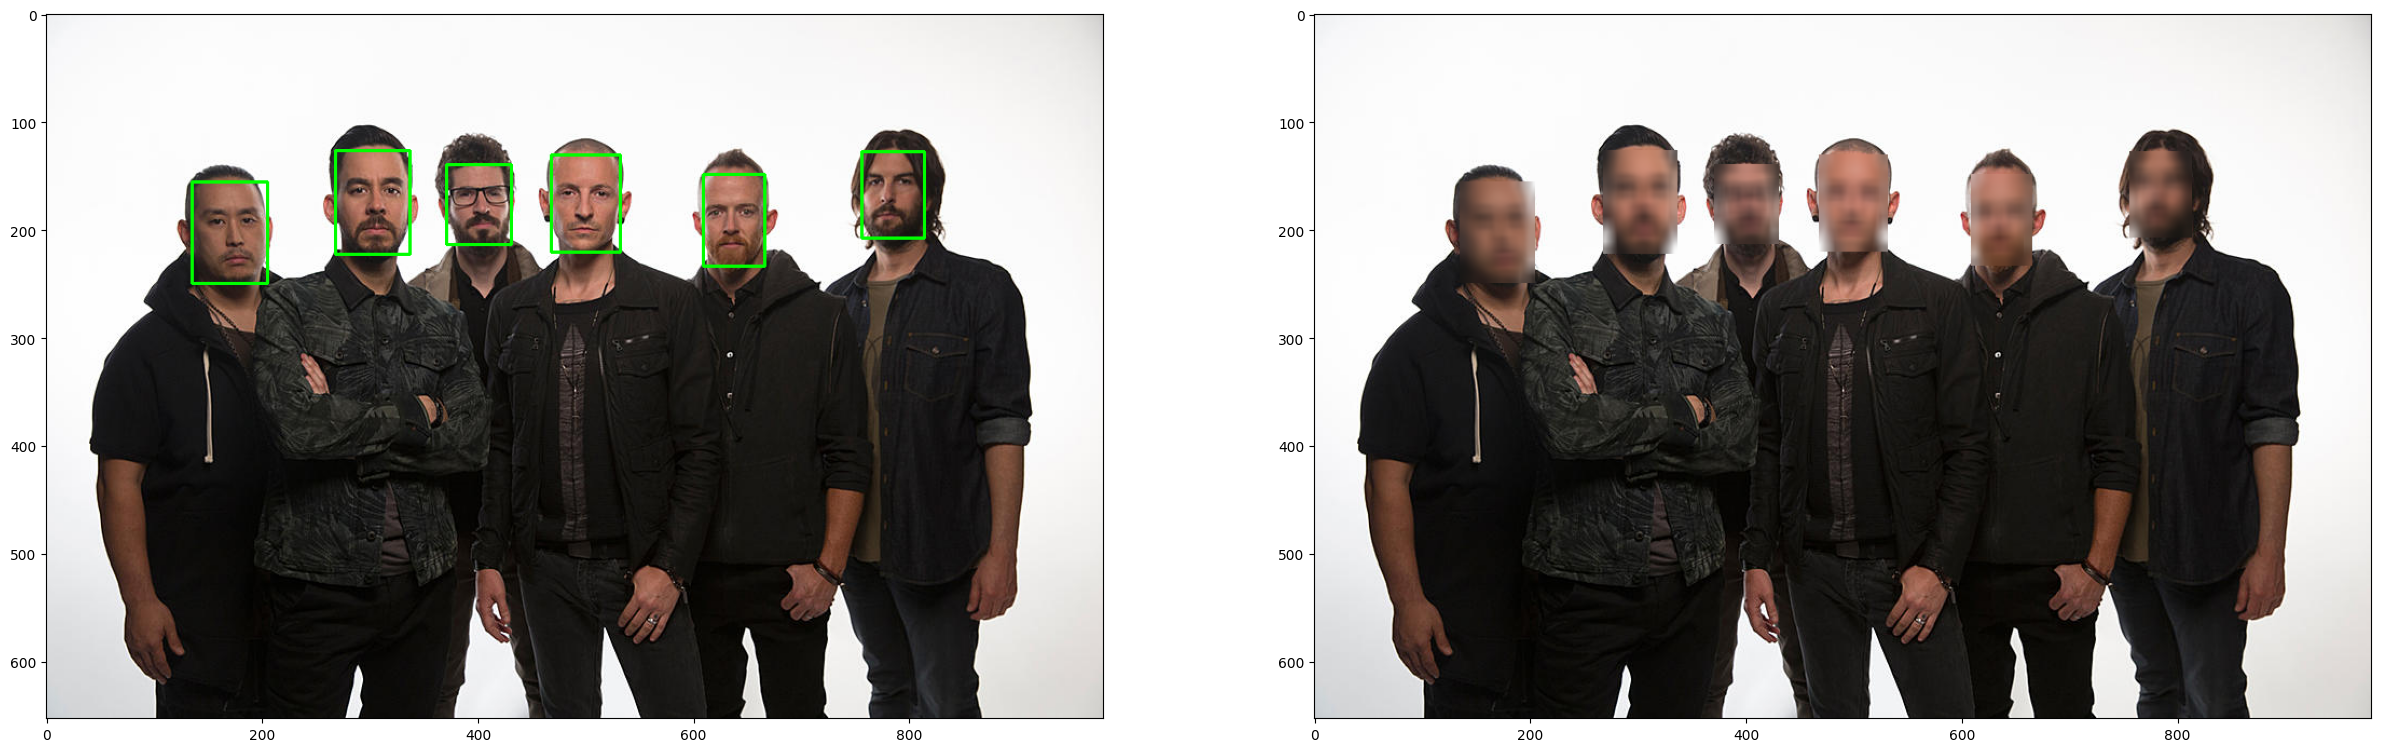

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## [initialize_FaceDetectorYN]
detector = cv2.FaceDetectorYN.create(
    "face_detection_yunet_2023mar.onnx",
    "",
    (320, 320),
    0.3,
    0.2,
    5000
)

image = cv2.imread("images/Linkin-Park.jpg")
height, width, _ = image.shape

# Set input size before inference
detector.setInputSize((width, height))

result = detector.detect(image)
print("number of detected faces:", len(result[1]))

# get a copy of the image to work on it
image2 = image.copy()

thickness=2
if result[1] is not None:
    for idx, face in enumerate(result[1]):
        coords = face[:-1].astype(np.int32)
        
        # drawing bounding boxes on original image
        cv2.rectangle(image, (coords[0], coords[1]), (coords[0]+coords[2], coords[1]+coords[3]), (0, 255, 0), thickness)
        
        # Blurring faces in copied image
        roi = image2[coords[1]:coords[1]+coords[3], coords[0]:coords[0]+coords[2]]
        blurred_roi = cv2.blur(roi, (15,15))
        image2[coords[1]:coords[1]+coords[3], coords[0]:coords[0]+coords[2]] = blurred_roi

plt.figure(figsize=[30,15])

plt.subplot(121); plt.imshow(image[...,::-1]);
plt.subplot(122); plt.imshow(image2[...,::-1]);